# DeepSleep 
## Notas

## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T

- Muestra: 240seg
- PowerProfiler freq: 10ms

In [1]:
board="wemosc3mini"
r = 10
ds = 30
TX = 1

batteries = [0.8, 2, 4, 10] #Ah

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

experiment_name = f"--{board}_r{r}_ds{ds}-T{TX}"
filename = f"../data/dslp{experiment_name}.csv"
print(experiment_name)

--wemosc3mini_r10_ds30-T1


In [3]:
df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-03-05 19:00:35.175610,195,1970-01-01 00:00:00,5.064,0.0292,0.14787,0.00292
1,1,2025-03-05 19:00:35.183562,204,1970-01-01 00:00:00,5.064,0.0756,0.38284,0.00756
2,2,2025-03-05 19:00:35.191579,211,1970-01-01 00:00:00,5.064,0.0756,0.38284,0.00756
3,3,2025-03-05 19:00:35.200570,221,1970-01-01 00:00:00,5.064,0.0740,0.37474,0.00740
4,4,2025-03-05 19:00:35.211431,231,1970-01-01 00:00:00,5.064,0.0296,0.14989,0.00296
...,...,...,...,...,...,...,...,...
20971,20971,2025-03-05 19:04:34.935291,239946,2025-03-05 19:04:34,5.104,0.0012,0.00612,0.00012
20972,20972,2025-03-05 19:04:34.947423,239958,2025-03-05 19:04:34,5.104,0.0012,0.00612,0.00012
20973,20973,2025-03-05 19:04:34.957331,239968,2025-03-05 19:04:34,5.104,0.0012,0.00612,0.00012
20974,20974,2025-03-05 19:04:34.969148,239980,2025-03-05 19:04:34,5.104,0.0012,0.00612,0.00012


In [4]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-03-05 19:00:35.175610,195,1970-01-01 00:00:00,5.064,0.0292,0.14787,0.00292
1,1,2025-03-05 19:00:35.183562,204,1970-01-01 00:00:00,5.064,0.0756,0.38284,0.00756
2,2,2025-03-05 19:00:35.191579,211,1970-01-01 00:00:00,5.064,0.0756,0.38284,0.00756
3,3,2025-03-05 19:00:35.200570,221,1970-01-01 00:00:00,5.064,0.0740,0.37474,0.00740
4,4,2025-03-05 19:00:35.211431,231,1970-01-01 00:00:00,5.064,0.0296,0.14989,0.00296
...,...,...,...,...,...,...,...,...
20971,20971,2025-03-05 19:04:34.935291,239946,2025-03-05 19:04:34,5.104,0.0012,0.00612,0.00012
20972,20972,2025-03-05 19:04:34.947423,239958,2025-03-05 19:04:34,5.104,0.0012,0.00612,0.00012
20973,20973,2025-03-05 19:04:34.957331,239968,2025-03-05 19:04:34,5.104,0.0012,0.00612,0.00012
20974,20974,2025-03-05 19:04:34.969148,239980,2025-03-05 19:04:34,5.104,0.0012,0.00612,0.00012


Text(0.5, 1.0, 'Current')

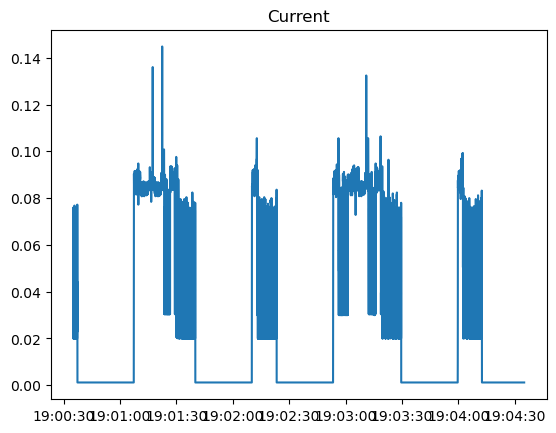

In [5]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

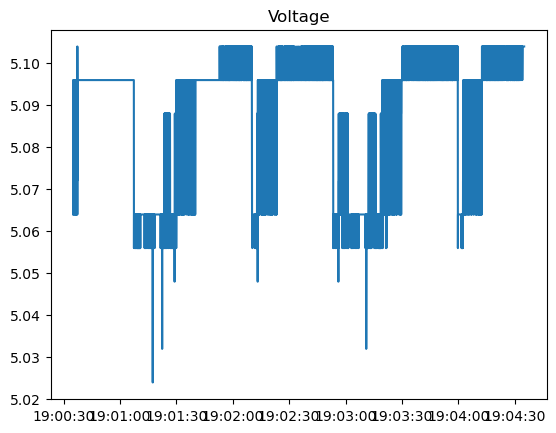

In [6]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [7]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

5.771347136600005

In [8]:
time_span = max(time_data)
time_span #seg

239.803653

In [9]:
avg_current = total_current / time_span
avg_current #A

0.02406696922419278

## Expected runtime using batteries

In [10]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	33.2 hours,	1.39 days
At 2.00Ah:	83.1 hours,	3.46 days
At 4.00Ah:	166.2 hours,	6.93 days
At 10.00Ah:	415.5 hours,	17.31 days
